# Day9

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
ad = pd.read_csv('/Users/Ganesh/Desktop/Cognixia/Data/Social_Network_Ads.csv')

In [22]:
ad.head(10)

User ID  Gender  Age  EstimatedSalary  Purchased
0  11021175    Male   42           121315          0
1  17782313    Male   53            67214          0
2  14603818  Female   59           111005          0
3  18188198  Female   39            53414          0
4  19357305    Male   39           114285          0
5  19524602    Male   39           107458          0
6  19455396  Female   20            85582          0
7  16879913  Female   59           148335          1
8  11838352    Male   48            80579          0
9  13118940  Female   42           114204          0

In [53]:
# ad.drop('User ID', axis=1, inplace=True)
# ad.Gender = ad.Gender.apply(lambda x: 1 if x=='Male' else 0)
# ad.Gender.map({'Male': 1, 'Female':0})

In [23]:
X = ad.iloc[:, [2,3]].values

In [24]:
y = ad.iloc[:, 4].values

In [26]:
y[:20]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1])

In [60]:
ad.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [8]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=2)
# train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=3)

In [35]:
test_y.shape

(80,)

In [10]:
test_y

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0])

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

In [39]:
train_X.shape

(320, 2)

In [13]:
train_y.shape

(320,)

In [41]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [42]:
y_pred = dtree.predict(test_X)

In [43]:
confusion_matrix(test_y, y_pred)

array([[ 0, 48],
       [ 0, 32]])

In [44]:
model_lr = LogisticRegression()
model_lr.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
y_pred = model_lr.predict(test_X)

In [46]:
# evaluate using confusion matrix -- if model is doing well or not
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred)

In [47]:
cm

array([[48,  0],
       [32,  0]])

In [ ]:
# confusion matrix --> summary in table format for prediction results - 
# for classification problem
# number of correct and incorrect predictions provided

In [88]:
# Another example of Logstic regression
wine = pd.read_csv('/Users/Ganesh/Desktop/Cognixia/Data/Wine.csv')

In [89]:
wine.head()

Alcohol  Malic_Acid  Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0       13           2    6            13        125              1   
1       11           6    4            10        147              3   
2       11           4    3            13         89              2   
3       15           6    6            11        151              4   
4       12           2    3            13        146              0   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  Hue  \
0           0                  0.71                3                8    1   
1           2                  0.66                4                2    2   
2           4                  0.36                2                3    1   
3           4                  0.54                5               11    1   
4           1                  0.35                2                7    1   

   OD280  Proline  Customer_Segment  
0      1     1004                 1  
1      1      681                 1  
2      3      946                 1  
3      3      319                 1  
4      3     1640                 1

In [90]:
wine.Customer_Segment.unique()

array([1, 2, 3])

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

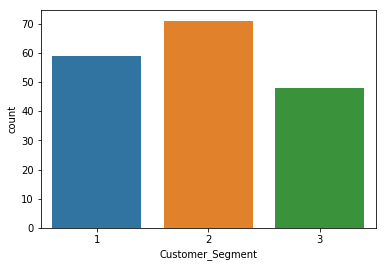

In [94]:
sns.countplot(wine['Customer_Segment'], label='Count')

In [95]:
# train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=3)
train, test = train_test_split(wine, test_size=0.2)

In [99]:
print(train.shape)
print(test.shape)

(142, 14)
(36, 14)


In [100]:
vars = wine.columns[:-1] # All columns except the last one (Customer_segment)
vars

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [102]:
train_X = train[vars]
train_y = train['Customer_Segment']
test_X = test[vars]
test_y = test['Customer_Segment']

In [103]:
model_lr = LogisticRegression()
model_lr.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [107]:
pred_y = model_lr.predict(test_X)

In [112]:
# pred_y --> result we got from model -- predicted
# test_y --> original data from data set -- correct one

In [113]:
pred_y

array([1, 3, 3, 3, 2, 2, 2, 3, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 3, 1, 3, 2, 1, 1, 1, 1, 2, 2, 3, 2, 1])

In [109]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(pred_y, test_y)

In [111]:
accuracy

0.4722222222222222

In [114]:
confusion_matrix(test_y, pred_y)

array([[6, 4, 1],
       [2, 8, 3],
       [4, 5, 3]])

In [115]:
# using decission tree
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(train_X, train_y)
pred_y = model_dt.predict()

In [116]:
accuracy_score(pred_y, test_y)

0.3055555555555556